1. Installing all the libraries.

In [1]:
import numpy as np 
import pandas as pd 
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.linear_model import LogisticRegression
from collections import Counter
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor
import warnings

warnings.filterwarnings("ignore")


In [2]:
data = pd.read_csv("weatherAUS_Train_Set.csv")

## Data Analysis

In [3]:
data.head(100)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,12/1/2008,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,12/2/2008,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,12/3/2008,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,12/4/2008,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,12/5/2008,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,3/6/2009,Albury,7.6,24.0,0.0,NaN,NaN,WSW,30.0,NaN,...,52.0,23.0,1014.5,1012.0,NaN,NaN,12.6,22.0,No,No
96,3/7/2009,Albury,8.3,27.9,0.0,NaN,NaN,W,37.0,S,...,58.0,22.0,1015.2,1012.4,NaN,NaN,13.3,27.0,No,No
97,3/8/2009,Albury,11.0,30.2,0.0,NaN,NaN,SSE,24.0,E,...,54.0,20.0,1017.0,1014.7,NaN,NaN,17.6,28.8,No,No
98,3/9/2009,Albury,13.8,31.8,0.0,NaN,NaN,NNE,24.0,SSE,...,49.0,28.0,1019.7,1015.9,NaN,NaN,18.6,30.5,No,No


In [4]:
data.shape


(102261, 23)

In [5]:
col_names = data.columns

col_names

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102261 entries, 0 to 102260
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           102261 non-null  object 
 1   Location       102261 non-null  object 
 2   MinTemp        101055 non-null  float64
 3   MaxTemp        101235 non-null  float64
 4   Rainfall       99692 non-null   float64
 5   Evaporation    57487 non-null   float64
 6   Sunshine       50166 non-null   float64
 7   WindGustDir    95750 non-null   object 
 8   WindGustSpeed  95760 non-null   float64
 9   WindDir9am     93888 non-null   object 
 10  WindDir3pm     99218 non-null   object 
 11  WindSpeed9am   100758 non-null  float64
 12  WindSpeed3pm   100147 non-null  float64
 13  Humidity9am    100171 non-null  float64
 14  Humidity3pm    99749 non-null   float64
 15  Pressure9am    91594 non-null   float64
 16  Pressure3pm    91639 non-null   float64
 17  Cloud9am       62132 non-null

In [7]:
data.describe()


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,101055.000000,101235.000000,99692.000000,57487.000000,50166.000000,95760.000000,100758.000000,100147.000000,100171.000000,99749.000000,91594.000000,91639.000000,62132.000000,60985.000000,100690.000000,100210.000000
mean,12.021216,22.686006,2.513042,5.153268,7.291620,39.690925,13.792761,18.750577,71.016512,53.550903,1017.989812,1015.637570,4.681742,4.715012,16.570249,21.199060
std,6.390850,6.876903,9.010921,3.905991,3.831655,13.942264,9.143453,9.205945,17.743800,20.157169,7.023113,6.936568,2.847112,2.676147,6.373218,6.688756
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,3.000000,1.000000,980.500000,979.000000,0.000000,0.000000,-7.200000,-5.400000
25%,7.400000,17.700000,0.000000,2.400000,4.300000,30.000000,7.000000,13.000000,59.000000,39.000000,1013.400000,1011.000000,2.000000,2.000000,11.900000,16.400000
50%,12.000000,22.400000,0.000000,4.400000,8.100000,37.000000,13.000000,19.000000,71.000000,54.000000,1018.000000,1015.600000,6.000000,5.000000,16.500000,20.900000
75%,16.900000,27.500000,0.800000,7.000000,10.400000,48.000000,19.000000,24.000000,84.000000,67.000000,1022.600000,1020.300000,7.000000,7.000000,21.300000,25.800000
max,33.900000,47.300000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1040.600000,1037.900000,9.000000,8.000000,38.600000,46.700000


In [8]:
data['RainTomorrow'].isnull().sum()


2568

We found that some of the values for our response variable is null, we will replace the null values with mode

In [9]:
data['RainTomorrow'].fillna(data['RainTomorrow'].mode()[0], inplace=True)

As we see below there are no more null values

In [10]:
data['RainTomorrow'].isnull().sum()


0

In [11]:
s = (data.dtypes == "object")
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)

Categorical variables:
['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [12]:
for i in object_cols:
    print(i, data[i].isnull().sum())

Date 0
Location 0
WindGustDir 6511
WindDir9am 8373
WindDir3pm 3043
RainToday 2569
RainTomorrow 0


In [13]:
t = (data.dtypes == "float64")
num_cols = list(t[t].index)

print("Neumeric variables:")
print(num_cols)

Neumeric variables:
['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [14]:
for i in num_cols:
    print(i, data[i].isnull().sum())

MinTemp 1206
MaxTemp 1026
Rainfall 2569
Evaporation 44774
Sunshine 52095
WindGustSpeed 6501
WindSpeed9am 1503
WindSpeed3pm 2114
Humidity9am 2090
Humidity3pm 2512
Pressure9am 10667
Pressure3pm 10622
Cloud9am 40129
Cloud3pm 41276
Temp9am 1571
Temp3pm 2051


We are checking how many null values are there

In [15]:
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,12/1/2008,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,12/2/2008,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,12/3/2008,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,12/4/2008,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,12/5/2008,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [16]:
data['RainTomorrow'].value_counts()

No     79111
Yes    23150
Name: RainTomorrow, dtype: int64

In [17]:
data['RainTomorrow'].value_counts()/len(data)

No     0.773618
Yes    0.226382
Name: RainTomorrow, dtype: float64

We see that the majority of the values are 'No'. We might have to sample the data to have a better model, also for our simplicity let us take No as 0 and Yes as 1

In [18]:
data['RainTomorrow'] = data['RainTomorrow'].map({'Yes': 1, 'No': 0})
data['RainToday'] = data['RainToday'].map({'Yes': 1, 'No': 0})

Plot

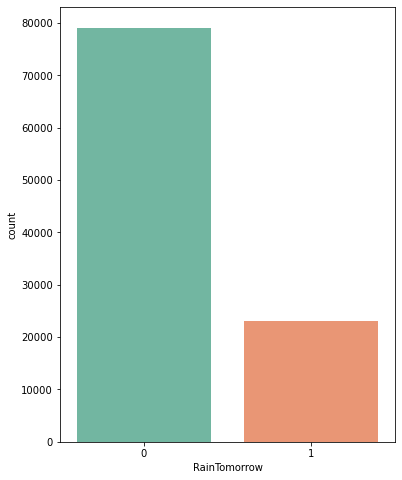

In [19]:
f, ax = plt.subplots(figsize=(6, 8))
ax = sns.countplot(x="RainTomorrow", data=data, palette="Set2")
plt.show()

In [20]:
for var in object_cols: 
    
    print(data[var].value_counts())

11/12/2013    34
3/1/2013      34
5/4/2014      34
5/5/2014      34
5/6/2014      34
              ..
11/29/2007     1
11/28/2007     1
11/27/2007     1
11/26/2007     1
1/31/2008      1
Name: Date, Length: 3436, dtype: int64
Canberra            3436
Sydney              3344
Adelaide            3193
Brisbane            3193
Melbourne           3193
Albury              3040
Wollongong          3040
Townsville          3040
GoldCoast           3040
Cairns              3040
Bendigo             3040
Ballarat            3040
MountGinini         3040
Tuggeranong         3039
Penrith             3039
Newcastle           3039
Williamtown         3009
Portland            3009
Cobar               3009
CoffsHarbour        3009
Moree               3009
Dartmoor            3009
Watsonia            3009
Mildura             3009
WaggaWagga          3009
NorfolkIsland       3009
MelbourneAirport    3009
Sale                3009
Richmond            3009
BadgerysCreek       3009
SydneyAirport       3009

For catogorical variables, we have to make sure that some of the values don't have high cardinality

In [21]:
for var in object_cols:
    
    print(var, ' has ', len(data[var].unique()), ' unqiue values')

Date  has  3436  unqiue values
Location  has  34  unqiue values
WindGustDir  has  17  unqiue values
WindDir9am  has  17  unqiue values
WindDir3pm  has  17  unqiue values
RainToday  has  3  unqiue values
RainTomorrow  has  2  unqiue values


Here we see that the Date column has unique values so we can convert the data

In [22]:
data['Date'] = pd.to_datetime(data['Date'])

In [23]:
data['Year'] = data['Date'].dt.year

data['Year'].head()

0    2008
1    2008
2    2008
3    2008
4    2008
Name: Year, dtype: int64

In [24]:
data['Month'] = data['Date'].dt.month

data['Month'].head()

0    12
1    12
2    12
3    12
4    12
Name: Month, dtype: int64

In [25]:
data['Day'] = data['Date'].dt.day

data['Day'].head()

0    1
1    2
2    3
3    4
4    5
Name: Day, dtype: int64

<AxesSubplot:xlabel='Month', ylabel='count'>

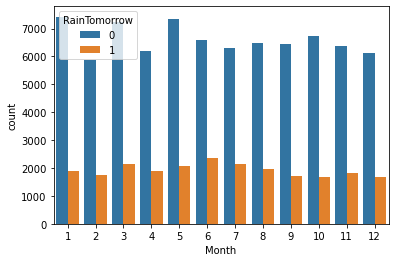

In [26]:
sns.countplot(data['Month'], hue=data['RainTomorrow'])

<AxesSubplot:xlabel='Year', ylabel='count'>

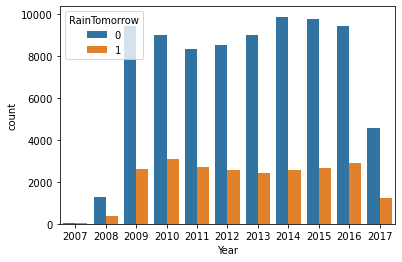

In [27]:
sns.countplot(data['Year'], hue=data['RainTomorrow'])

<AxesSubplot:xlabel='RainToday', ylabel='count'>

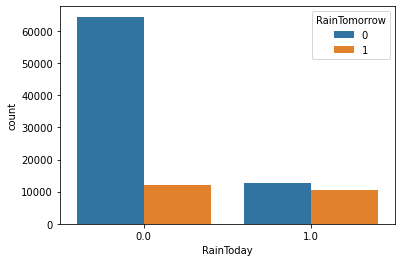

In [28]:
sns.countplot(data['RainToday'], hue=data['RainTomorrow'])

<AxesSubplot:xlabel='Location', ylabel='count'>

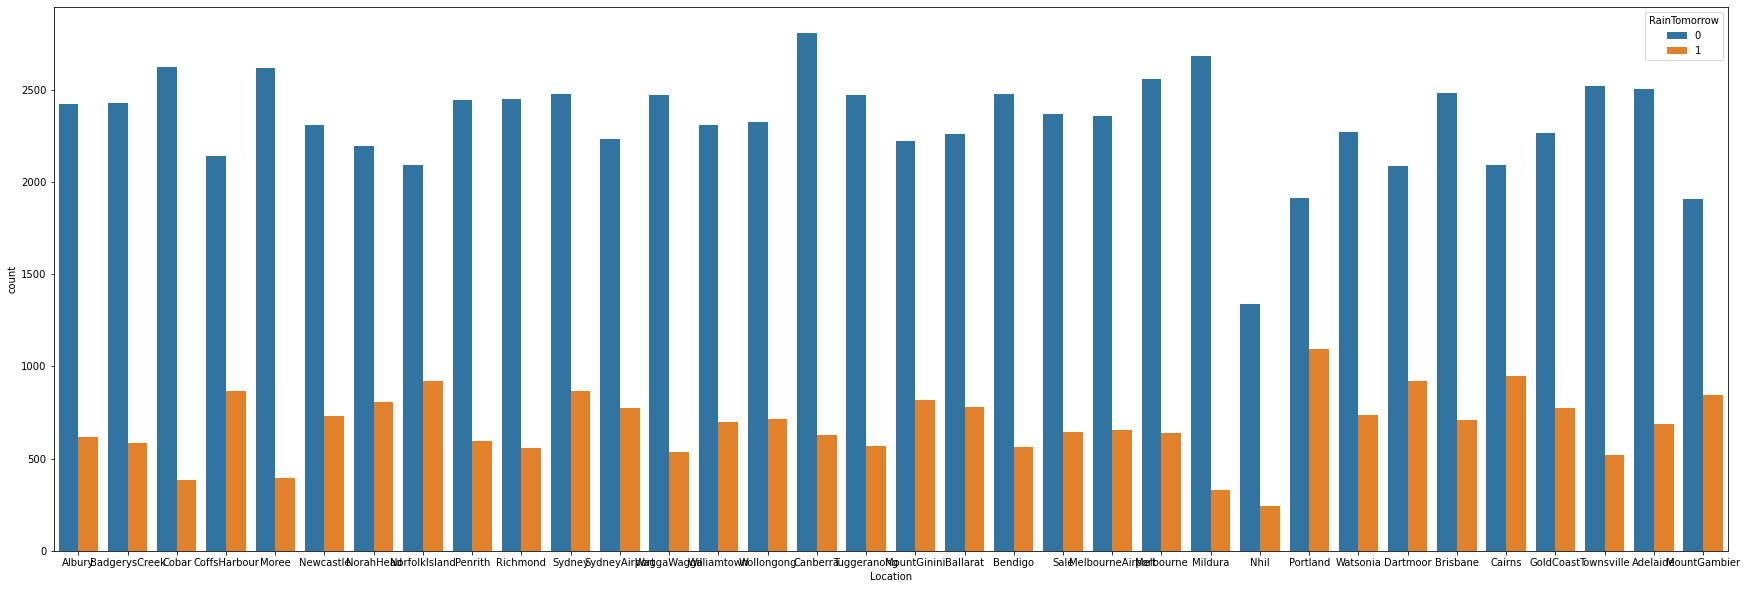

In [29]:
plt.figure(figsize=(30, 10))
sns.countplot(data['Location'], hue=data['RainTomorrow'])

In [30]:
data.columns


Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'Year', 'Month', 'Day'],
      dtype='object')

In [31]:
num_data = data[num_cols]
num_data.describe().T.style.bar(subset=['mean'], color='#205ff2')\
                            .background_gradient(subset=['std'], cmap='Reds')\
                             .background_gradient(subset=['50%'], cmap='coolwarm')

,count,mean,std,min,25%,50%,75%,max
MinTemp,101055.000000,12.021216,6.390850,-8.500000,7.400000,12.000000,16.900000,33.900000
MaxTemp,101235.000000,22.686006,6.876903,-4.800000,17.700000,22.400000,27.500000,47.300000
Rainfall,99692.000000,2.513042,9.010921,0.000000,0.000000,0.000000,0.800000,371.000000
Evaporation,57487.000000,5.153268,3.905991,0.000000,2.400000,4.400000,7.000000,145.000000
Sunshine,50166.000000,7.291620,3.831655,0.000000,4.300000,8.100000,10.400000,14.500000
WindGustSpeed,95760.000000,39.690925,13.942264,7.000000,30.000000,37.000000,48.000000,135.000000
WindSpeed9am,100758.000000,13.792761,9.143453,0.000000,7.000000,13.000000,19.000000,130.000000
WindSpeed3pm,100147.000000,18.750577,9.205945,0.000000,13.000000,19.000000,24.000000,87.000000
Humidity9am,100171.000000,71.016512,17.743800,3.000000,59.000000,71.000000,84.000000,100.000000
Humidity3pm,99749.000000,53.550903,20.157169,1.000000,39.000000,54.000000,67.000000,100.000000


We can see that some of the columns have outliers.

In [32]:
correlation = data.corr()

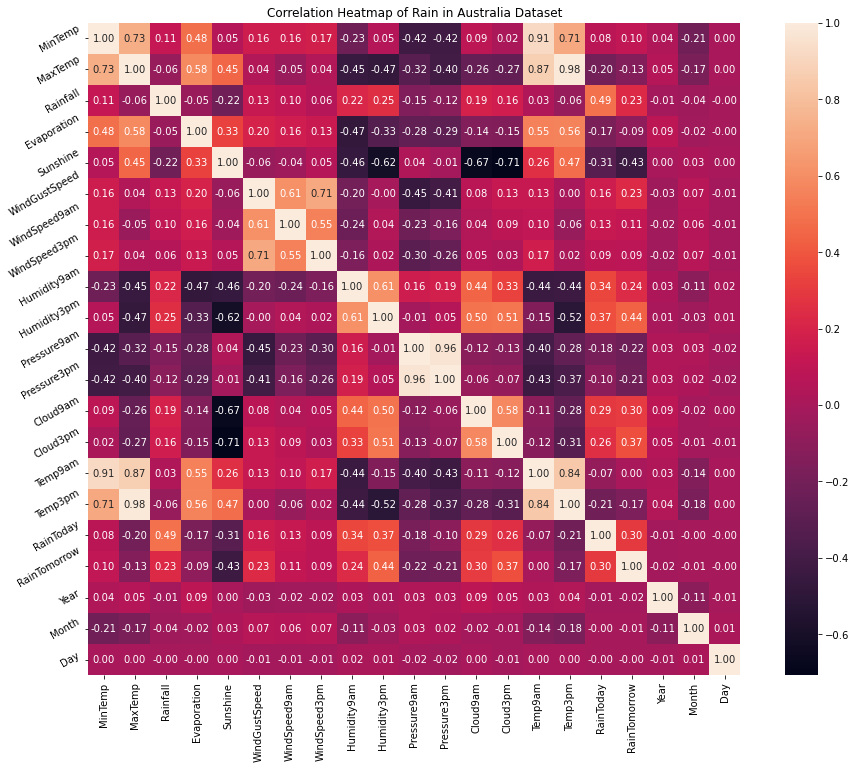

In [33]:
plt.figure(figsize=(16,12))
plt.title('Correlation Heatmap of Rain in Australia Dataset')
ax = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_yticklabels(ax.get_yticklabels(), rotation=30)           
plt.show()

This are the coorrelation between all the variables


In [34]:
num_var = ['MinTemp', 'MaxTemp', 'Temp9am', 'Temp3pm', 'WindGustSpeed', 'WindSpeed3pm', 'Pressure9am', 'Pressure3pm']

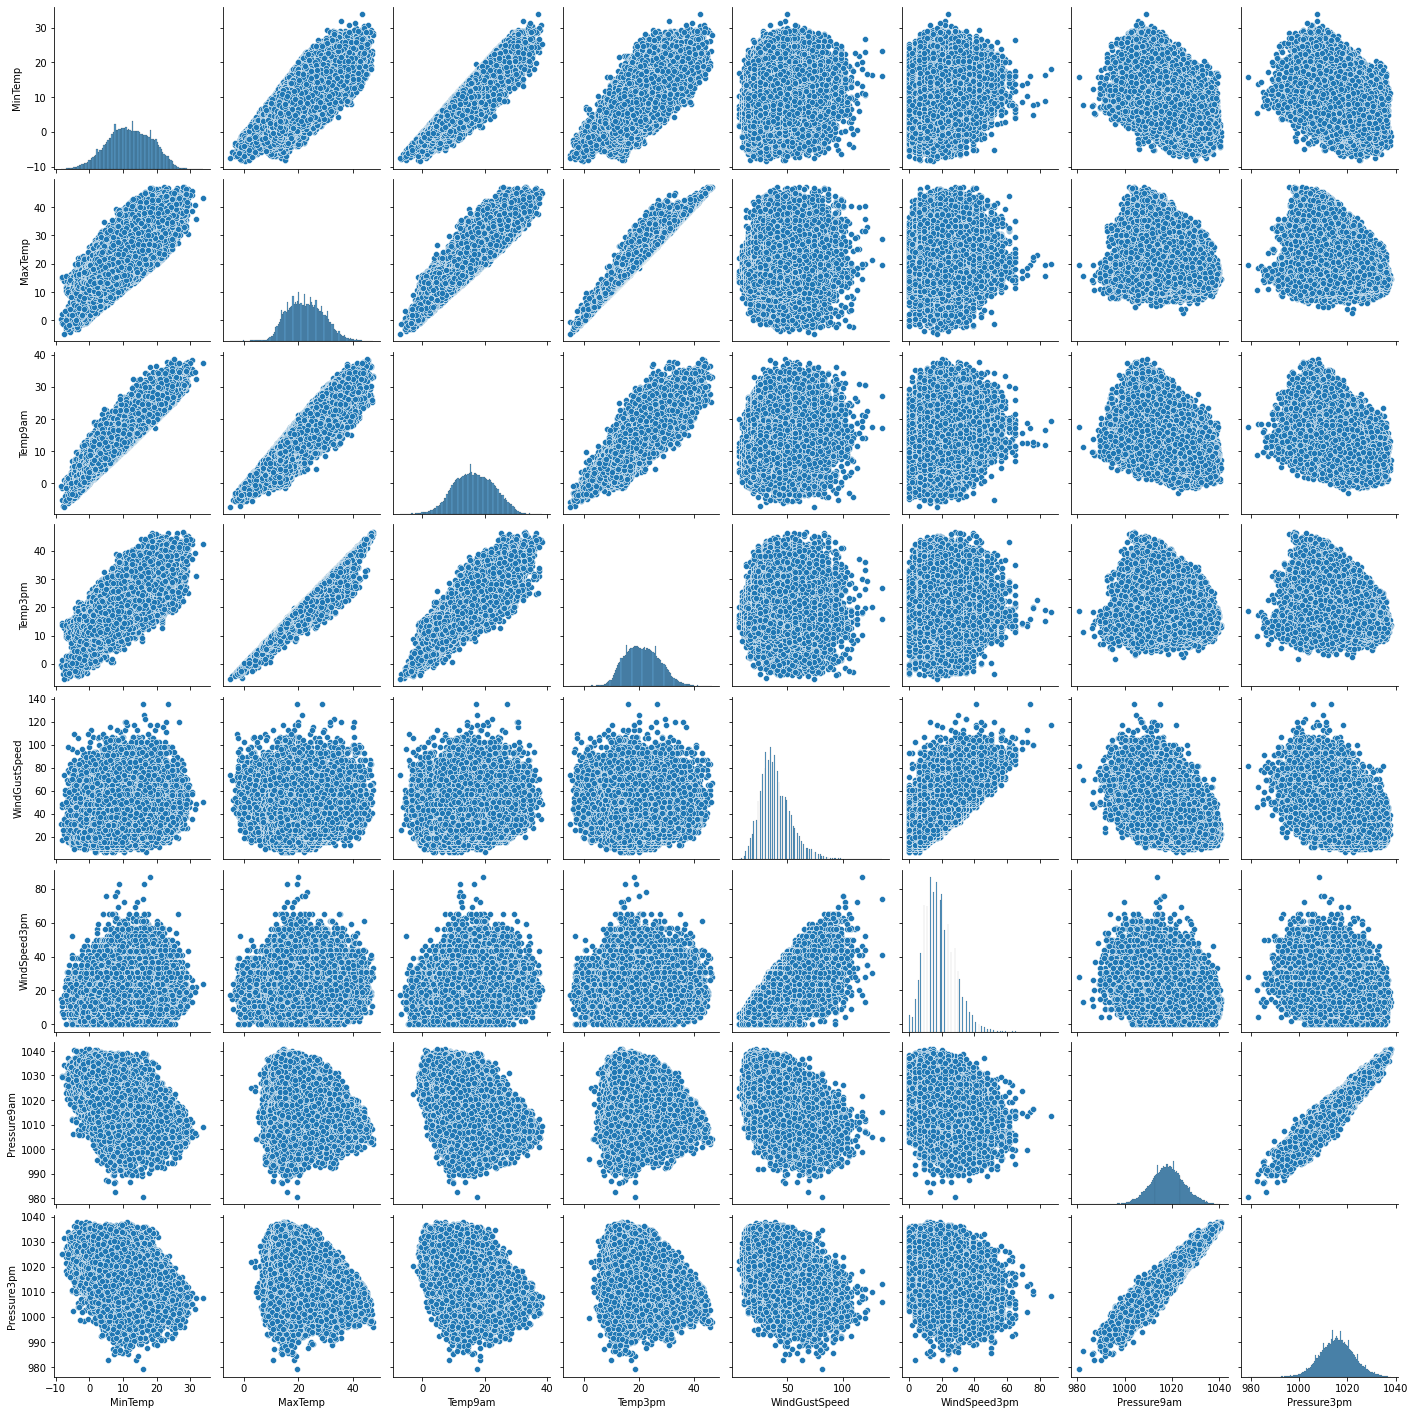

In [35]:
sns.pairplot(data[num_var], kind='scatter', diag_kind='hist', palette='Rainbow')
plt.show()

In [36]:
object_cols

['Date',
 'Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

## Feature Engineering

In [37]:
from sklearn.impute import SimpleImputer


imputer1 = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer2 =SimpleImputer(missing_values = np.nan, strategy = 'median')
data[['Evaporation']] = imputer2.fit_transform(data[['Evaporation']])
data[['Sunshine']] = imputer1.fit_transform(data[['Sunshine']])
data[['Cloud3pm']] = imputer2.fit_transform(data[['Cloud3pm']])
data[['Cloud9am']] = imputer1.fit_transform(data[['Cloud9am']])
#mean and median are same for Pressure9am and Pressure3pm
data[['Pressure9am']] = imputer1.fit_transform(data[['Pressure9am']])
data[['Pressure3pm']] = imputer1.fit_transform(data[['Pressure3pm']])


In [38]:
data.isnull().sum()

Date                0
Location            0
MinTemp          1206
MaxTemp          1026
Rainfall         2569
Evaporation         0
Sunshine            0
WindGustDir      6511
WindGustSpeed    6501
WindDir9am       8373
WindDir3pm       3043
WindSpeed9am     1503
WindSpeed3pm     2114
Humidity9am      2090
Humidity3pm      2512
Pressure9am         0
Pressure3pm         0
Cloud9am            0
Cloud3pm            0
Temp9am          1571
Temp3pm          2051
RainToday        2569
RainTomorrow        0
Year                0
Month               0
Day                 0
dtype: int64

In [39]:
data = data.dropna()

#encoding categorical variables to numeric ones
from sklearn.preprocessing import LabelEncoder
for c in data.columns:
    if data[c].dtype=='object':    #Since we are encoding object datatype to integer/float
        lbl = LabelEncoder()
        lbl.fit(list(data[c].values))
        data[c] = lbl.transform(data[c].values)

In [40]:
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,2008-12-01,1,13.4,22.9,0.6,4.4,7.29162,13,44.0,13,...,1007.1,8.000000,5.0,16.9,21.8,0.0,0,2008,12,1
1,2008-12-02,1,7.4,25.1,0.0,4.4,7.29162,14,44.0,6,...,1007.8,4.681742,5.0,17.2,24.3,0.0,0,2008,12,2
2,2008-12-03,1,12.9,25.7,0.0,4.4,7.29162,15,46.0,13,...,1008.7,4.681742,2.0,21.0,23.2,0.0,0,2008,12,3
3,2008-12-04,1,9.2,28.0,0.0,4.4,7.29162,4,24.0,9,...,1012.8,4.681742,5.0,18.1,26.5,0.0,0,2008,12,4
4,2008-12-05,1,17.5,32.3,1.0,4.4,7.29162,13,41.0,1,...,1006.0,7.000000,8.0,17.8,29.7,0.0,0,2008,12,5


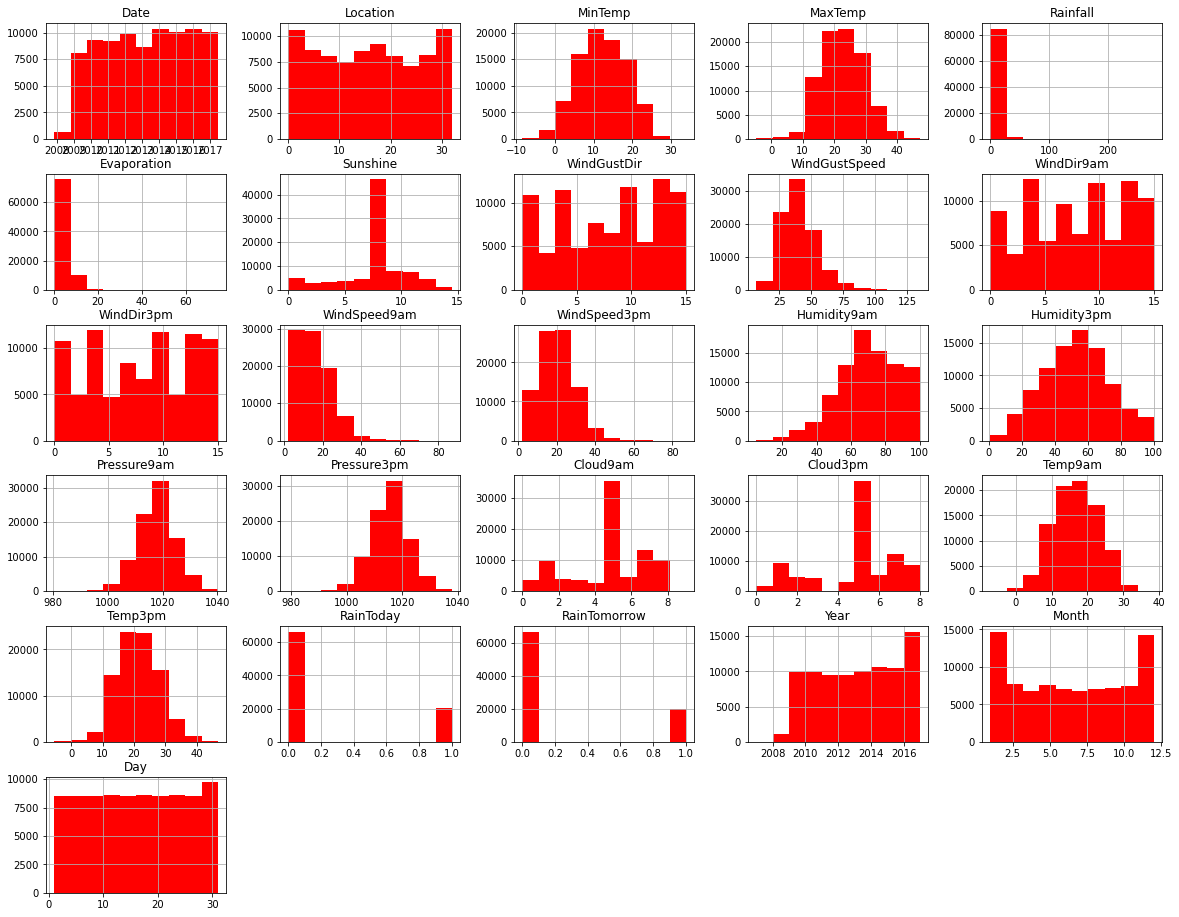

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline

data.hist(figsize=(20,16), color = 'r');
plt.show()

As mentioned before we can see that 'RainToday' and 'RaindTomorrow' don't have balanced distribution. Let us try to resample the data for better accuracy.

In [42]:
zero  = data[data['RainTomorrow']==0]   #zero values in outcome column
one = data[data['RainTomorrow']==1]  # one values in outcome column
from sklearn.utils import resample
data_minority_upsampled = resample(one, replace = True, n_samples = 80537) 
#concatenate
data = pd.concat([zero, data_minority_upsampled])

from sklearn.utils import shuffle
data = shuffle(data) # shuffling so that there is particular sequence

In [43]:
zero  = data[data['RainToday']==0]   #zero values in outcome column
one = data[data['RainToday']==1]  # one values in outcome column
from sklearn.utils import resample
data_minority_upsampled = resample(one, replace = True, n_samples = 80537) 
#concatenate
data = pd.concat([zero, data_minority_upsampled])

from sklearn.utils import shuffle
data = shuffle(data) # shuffling so that there is particular sequence

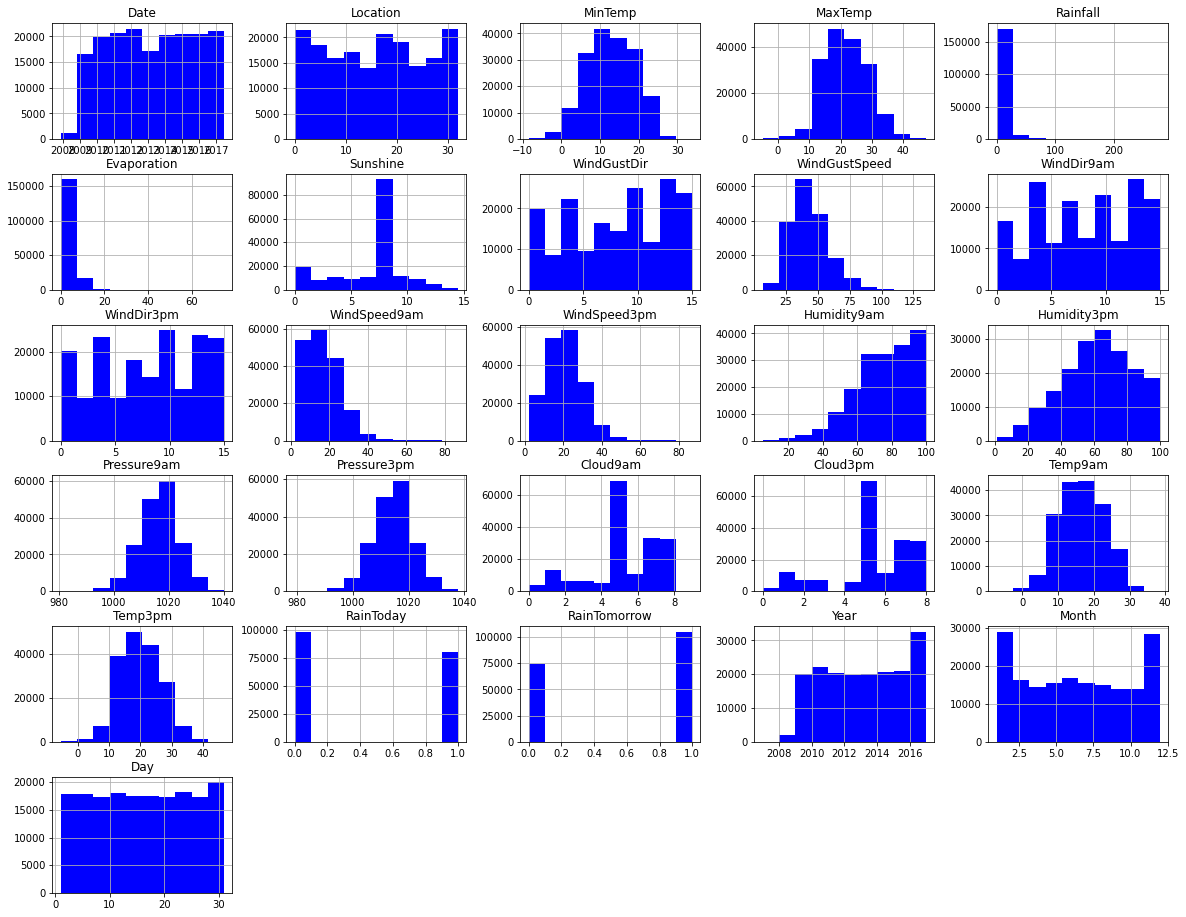

In [44]:
data.hist(figsize=(20,16), color = 'b');
plt.show();

In [45]:
data.corr().abs()['RainTomorrow'].sort_values(ascending = False)

RainTomorrow     1.000000
Humidity3pm      0.512115
Cloud3pm         0.360758
Sunshine         0.360175
RainToday        0.342261
Humidity9am      0.332069
Cloud9am         0.307323
WindGustSpeed    0.256206
Pressure9am      0.242404
Pressure3pm      0.224566
Rainfall         0.216377
Temp3pm          0.208363
MaxTemp          0.172106
WindSpeed9am     0.136982
MinTemp          0.112486
WindSpeed3pm     0.110645
Evaporation      0.094100
WindGustDir      0.021594
Year             0.017872
Temp9am          0.017657
Month            0.015535
WindDir3pm       0.010843
WindDir9am       0.010786
Day              0.003143
Location         0.000056
Name: RainTomorrow, dtype: float64

In [46]:
X = data.drop(['RainTomorrow','Date'], axis=1)

y = data['RainTomorrow']

In [47]:
X.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Year,Month,Day
56113,3,7.1,16.5,1.4,4.4,7.29162,15,26.0,11,15,...,1013.6,1011.5,8.000000,5.0,10.2,15.7,1.0,2011,10,8
88637,6,23.5,31.6,24.2,8.2,7.90000,9,48.0,8,9,...,1011.3,1008.4,7.000000,7.0,25.9,30.0,1.0,2013,1,7
38876,29,7.5,14.7,18.0,3.2,1.00000,15,33.0,13,12,...,1008.1,1011.7,7.000000,7.0,10.3,12.8,1.0,2015,9,3
61041,4,20.4,26.2,0.6,4.4,7.29162,13,33.0,6,6,...,1009.2,1006.9,7.000000,2.0,21.2,25.9,0.0,2017,2,5
81091,10,4.2,16.7,0.0,3.4,1.20000,13,30.0,5,15,...,1024.6,1023.8,4.681742,5.0,8.7,16.1,0.0,2009,4,4


In [48]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

fs = SelectKBest(score_func=f_classif, k=15)
# apply feature selection
X_selected = fs.fit_transform(X, y)
print(X_selected.shape)
 

(178914, 15)


In [49]:
cols = fs.get_support(indices=True)
X_new = X.iloc[:,cols]

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.25, random_state = 42)

In [51]:
X_train.shape, X_test.shape

((134185, 15), (44729, 15))

In [52]:
numerical = [col for col in X_train.columns if X_train[col].dtypes != 'O']

numerical

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp3pm',
 'RainToday']

In [53]:
X_train[numerical].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp3pm          0
RainToday        0
dtype: int64

In [54]:
for col in numerical:
    if X_train[col].isnull().mean()>0:
        print(col, round(X_train[col].isnull().mean(),4))

In [55]:
for df1 in [X_train, X_test]:
    for col in numerical:
        col_median=X_train[col].median()
        df1[col].fillna(col_median, inplace=True)           

In [56]:
X_train[numerical].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp3pm          0
RainToday        0
dtype: int64

We are removing the outliers

In [57]:
IQR = data.Rainfall.quantile(0.75) - data.Rainfall.quantile(0.25)
Lower_fence = data.Rainfall.quantile(0.25) - (IQR * 3)
Upper_fence = data.Rainfall.quantile(0.75) + (IQR * 3)
print('Rainfall outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

Rainfall outliers are values < -15.0 or > 20.0


In [58]:
IQR = data.WindSpeed9am.quantile(0.75) - data.WindSpeed9am.quantile(0.25)
Lower_fence = data.WindSpeed9am.quantile(0.25) - (IQR * 3)
Upper_fence = data.WindSpeed9am.quantile(0.75) + (IQR * 3)
print('WindSpeed9am outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

WindSpeed9am outliers are values < -24.0 or > 53.0


In [59]:
IQR = data.WindSpeed3pm.quantile(0.75) - data.WindSpeed3pm.quantile(0.25)
Lower_fence = data.WindSpeed3pm.quantile(0.25) - (IQR * 3)
Upper_fence = data.WindSpeed3pm.quantile(0.75) + (IQR * 3)
print('WindSpeed3pm outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

WindSpeed3pm outliers are values < -26.0 or > 65.0


In [60]:
def max_value(df3, variable, top):
    return np.where(df3[variable]>top, top, df3[variable])

for df3 in [X_train, X_test]:
    df3['Rainfall'] = max_value(df3, 'Rainfall', 18.4)
    df3['WindSpeed9am'] = max_value(df3, 'WindSpeed9am', 53)
    df3['WindSpeed3pm'] = max_value(df3, 'WindSpeed3pm', 65)

In [61]:
X_train[numerical].describe().T.style.bar(subset=['mean'], color='#205ff2')\
                            .background_gradient(subset=['std'], cmap='Reds')\
                             .background_gradient(subset=['50%'], cmap='coolwarm')

,count,mean,std,min,25%,50%,75%,max
MinTemp,134185.000000,12.825629,6.266266,-8.500000,8.200000,12.800000,17.700000,31.900000
MaxTemp,134185.000000,21.686341,6.892236,-4.800000,16.500000,21.300000,26.700000,47.300000
Rainfall,134185.000000,3.767835,5.837185,0.000000,0.000000,0.400000,5.000000,18.400000
Sunshine,134185.000000,6.464181,2.961778,0.000000,5.300000,7.291620,7.291620,14.500000
WindGustSpeed,134185.000000,43.424086,14.945986,7.000000,33.000000,41.000000,52.000000,135.000000
WindSpeed9am,134185.000000,15.943228,9.024329,2.000000,9.000000,15.000000,20.000000,53.000000
WindSpeed3pm,134185.000000,20.271476,9.462074,2.000000,13.000000,19.000000,26.000000,65.000000
Humidity9am,134185.000000,75.403555,17.184657,5.000000,64.000000,77.000000,90.000000,100.000000
Humidity3pm,134185.000000,62.273525,21.175578,1.000000,48.000000,63.000000,78.000000,100.000000
Pressure9am,134185.000000,1016.367352,7.129289,980.500000,1011.900000,1016.900000,1020.900000,1040.200000


In [62]:
pip install -U imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [63]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [64]:
X.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'Year', 'Month', 'Day'],
      dtype='object')

## Model Building

In [65]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression


# instantiate the model
logreg = LogisticRegression(solver='liblinear', random_state=0)


# fit the model
logreg.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [66]:
y_pred_test = logreg.predict(X_test)

y_pred_test

array([1, 1, 1, ..., 1, 0, 1], dtype=int64)

In [67]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score: 0.7904


In [68]:
y_pred_train = logreg.predict(X_train)

y_pred_train

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [69]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.7913


In [70]:
def plot_roc_cur(fper, tper):  
    plt.plot(fper, tper, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [71]:
import time
from sklearn.metrics import accuracy_score, roc_auc_score, cohen_kappa_score, plot_confusion_matrix, roc_curve, classification_report
def run_model(model, X_train, y_train, X_test, y_test, verbose=True):
    t0=time.time()
    if verbose == False:
        model.fit(X_train,y_train, verbose=0)
    else:
        model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred) 
    coh_kap = cohen_kappa_score(y_test, y_pred)
    time_taken = time.time()-t0
    print("Accuracy = {}".format(accuracy))
    print("ROC Area under Curve = {}".format(roc_auc))
    print("Cohen's Kappa = {}".format(coh_kap))
    print("Time taken = {}".format(time_taken))
    print(classification_report(y_test,y_pred,digits=5))
    
    probs = model.predict_proba(X_test)  
    probs = probs[:, 1]  
    fper, tper, thresholds = roc_curve(y_test, probs) 
    plot_roc_cur(fper, tper)
    
    plot_confusion_matrix(model, X_test, y_test,cmap=plt.cm.Blues, normalize = 'all')
    
    return model, accuracy, roc_auc, coh_kap, time_taken

Accuracy = 0.7903820787408616
ROC Area under Curve = 0.7809791718504231
Cohen's Kappa = 0.565224530555891
Time taken = 1.490243673324585
              precision    recall  f1-score   support

           0    0.75636   0.72682   0.74129     18482
           1    0.81279   0.83514   0.82381     26247

    accuracy                        0.79038     44729
   macro avg    0.78457   0.78098   0.78255     44729
weighted avg    0.78947   0.79038   0.78972     44729



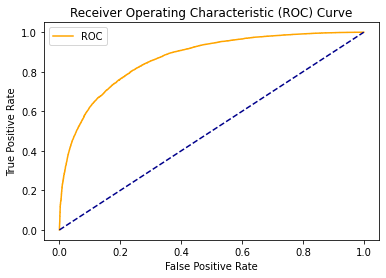

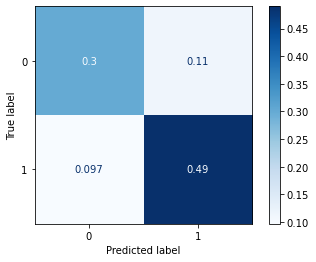

In [72]:
from sklearn.linear_model import LogisticRegression

params_lr = {'penalty': 'l1', 'solver':'liblinear'}

model_lr = LogisticRegression(**params_lr)
model_lr, accuracy_lr, roc_auc_lr, coh_kap_lr, tt_lr = run_model(model_lr, X_train, y_train, X_test, y_test)

Accuracy = 0.8581010082943952
ROC Area under Curve = 0.848853520351414
Cohen's Kappa = 0.7045242253806676
Time taken = 0.29372429847717285
              precision    recall  f1-score   support

           0    0.85127   0.79558   0.82249     18482
           1    0.86240   0.90212   0.88181     26247

    accuracy                        0.85810     44729
   macro avg    0.85683   0.84885   0.85215     44729
weighted avg    0.85780   0.85810   0.85730     44729



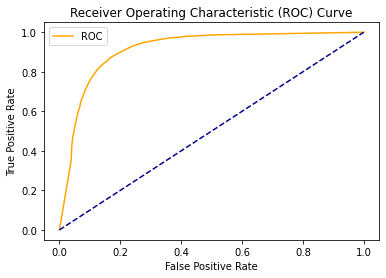

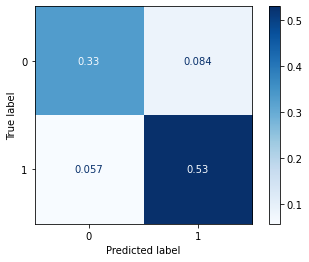

In [73]:
from sklearn.tree import DecisionTreeClassifier

params_dt = {'max_depth': 16,
             'max_features': "sqrt"}

model_dt = DecisionTreeClassifier(**params_dt)
model_dt, accuracy_dt, roc_auc_dt, coh_kap_dt, tt_dt = run_model(model_dt, X_train, y_train, X_test, y_test)

Accuracy = 0.9213038520870129
ROC Area under Curve = 0.9146085774827238
Cohen's Kappa = 0.8363257341320803
Time taken = 18.79314374923706
              precision    recall  f1-score   support

           0    0.92945   0.87604   0.90196     18482
           1    0.91611   0.95318   0.93427     26247

    accuracy                        0.92130     44729
   macro avg    0.92278   0.91461   0.91811     44729
weighted avg    0.92162   0.92130   0.92092     44729



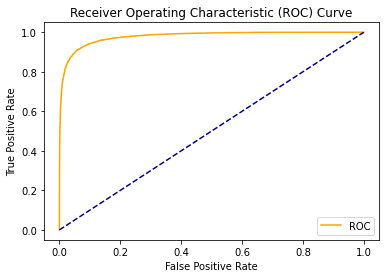

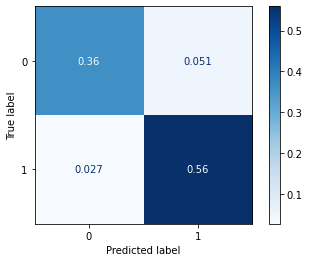

In [74]:
from sklearn.ensemble import RandomForestClassifier

params_rf = {'max_depth': 16,
             'min_samples_leaf': 1,
             'min_samples_split': 2,
             'n_estimators': 100,
             'random_state': 12345}

model_rf = RandomForestClassifier(**params_rf)
model_rf, accuracy_rf, roc_auc_rf, coh_kap_rf, tt_rf = run_model(model_rf, X_train, y_train, X_test, y_test)

Accuracy = 0.8476379977196002
ROC Area under Curve = 0.8393139386082522
Cohen's Kappa = 0.6835351035972806
Time taken = 1.8426189422607422
              precision    recall  f1-score   support

           0    0.83173   0.79136   0.81105     18482
           1    0.85794   0.88726   0.87236     26247

    accuracy                        0.84764     44729
   macro avg    0.84484   0.83931   0.84170     44729
weighted avg    0.84711   0.84764   0.84702     44729



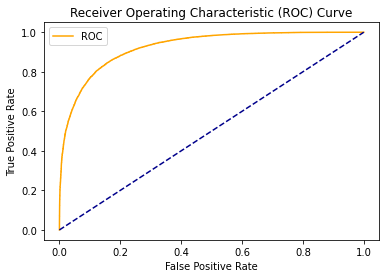

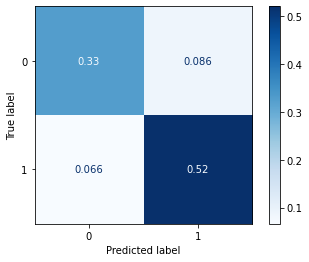

In [75]:
import lightgbm as lgb
params_lgb ={'colsample_bytree': 0.95, 
         'max_depth': 16, 
         'min_split_gain': 0.1, 
         'n_estimators': 200, 
         'num_leaves': 50, 
         'reg_alpha': 1.2, 
         'reg_lambda': 1.2, 
         'subsample': 0.95, 
         'subsample_freq': 20}

model_lgb = lgb.LGBMClassifier(**params_lgb)
model_lgb, accuracy_lgb, roc_auc_lgb, coh_kap_lgb, tt_lgb = run_model(model_lgb, X_train, y_train, X_test, y_test)

Accuracy = 0.9677390507277158
ROC Area under Curve = 0.9634671291984388
Cohen's Kappa = 0.9330352854669975
Time taken = 58.8396680355072
              precision    recall  f1-score   support

           0    0.98228   0.93886   0.96008     18482
           1    0.95825   0.98807   0.97293     26247

    accuracy                        0.96774     44729
   macro avg    0.97026   0.96347   0.96651     44729
weighted avg    0.96818   0.96774   0.96762     44729



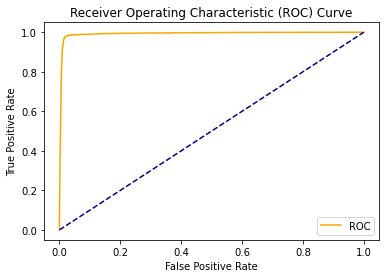

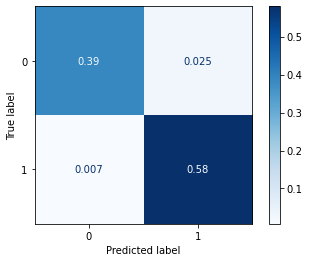

In [76]:
import xgboost as xgb
params_xgb ={'n_estimators': 500,
            'max_depth': 16}

model_xgb = xgb.XGBClassifier(**params_xgb)
model_xgb, accuracy_xgb, roc_auc_xgb, coh_kap_xgb, tt_xgb = run_model(model_xgb, X_train, y_train, X_test, y_test)

In [77]:
import keras
from keras.models import Sequential
from keras.layers import Dense

  # create model
model = Sequential()
model.add(Dense(1024, input_dim= 15, activation='relu'))
model.add(Dense(712, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

early_stopping = keras.callbacks.EarlyStopping( patience = 12, min_delta = 0.001,
                                               restore_best_weights =True )
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['binary_accuracy'])
# Fit the model
history = model.fit(X_train, y_train, epochs=50, batch_size=100, 
                     validation_data=(X_test, y_test),
                    verbose=1)
# evaluate the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

Epoch 1/50
1342/1342 [==============================] - 20s 14ms/step - loss: 0.4331 - binary_accuracy: 0.7971 - val_loss: 0.4230 - val_binary_accuracy: 0.8031
Epoch 2/50
1342/1342 [==============================] - 19s 14ms/step - loss: 0.4189 - binary_accuracy: 0.8052 - val_loss: 0.4157 - val_binary_accuracy: 0.8087
Epoch 3/50
1342/1342 [==============================] - 19s 14ms/step - loss: 0.4094 - binary_accuracy: 0.8111 - val_loss: 0.4055 - val_binary_accuracy: 0.8139
Epoch 4/50
1342/1342 [==============================] - 21s 16ms/step - loss: 0.3989 - binary_accuracy: 0.8172 - val_loss: 0.4002 - val_binary_accuracy: 0.8166
Epoch 5/50
1342/1342 [==============================] - 19s 14ms/step - loss: 0.3866 - binary_accuracy: 0.8235 - val_loss: 0.3860 - val_binary_accuracy: 0.8262
Epoch 6/50
1342/1342 [==============================] - 18s 14ms/step - loss: 0.3712 - binary_accuracy: 0.8319 - val_loss: 0.3727 - val_binary_accuracy: 0.8315
Epoch 7/50
1342/1342 [==================

In [78]:
model.evaluate(X_test, y_test)

1398/1398 [==============================] - 5s 3ms/step - loss: 0.3241 - binary_accuracy: 0.9375


[0.32411372661590576, 0.9374678730964661]

In [79]:
model.evaluate(X_train, y_train)

4194/4194 [==============================] - 15s 3ms/step - loss: 0.0452 - binary_accuracy: 0.9854


[0.045202285051345825, 0.9854081869125366]

In [80]:
predictions =(model.predict(X_test)>0.5).astype("int32")
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

1398/1398 [==============================] - 5s 3ms/step
              precision    recall  f1-score   support

           0       0.95      0.90      0.92     18482
           1       0.93      0.96      0.95     26247

    accuracy                           0.94     44729
   macro avg       0.94      0.93      0.94     44729
weighted avg       0.94      0.94      0.94     44729



In [81]:


y_pred_test = model_xgb.predict(X_test)


In [82]:
y_pred_test

array([0, 1, 1, ..., 0, 0, 1])

In [83]:
df = pd.DataFrame(y_pred_test)

In [84]:
df.head()

,0
0,0
1,1
2,1
3,1
4,1


In [85]:
df.columns

RangeIndex(start=0, stop=1, step=1)

In [86]:
df.columns = ['RainTomorrow']

In [87]:
df.head()

,RainTomorrow
0,0
1,1
2,1
3,1
4,1


In [88]:
df['RainTomorrow'] = df['RainTomorrow'].map({1: 'Yes', 0: 'No'})

In [89]:
df.head()

,RainTomorrow
0,No
1,Yes
2,Yes
3,Yes
4,Yes


Conclusion : We see that XgBoost gives us the best accuracy of 96.4%